# **Background**

### What is this about
This is an expirement on the difference between two forms of naive bayes + laplace smoothing in text classification, namely:
1. Multivariate Bernoulli Event Model (MVBEM)
2. Multinomial Event Model (MNEM)

### The Goal 
The goal is to apply both versions of Naive Bayes to predict whether an email text is a SPAM or HAM and measure whether one technique is better than the other and which areas do they both excell at.

### Naive Bayes summary
The Naive Bayes, when applied to text classification, assumes that the words are conditionally independent from each other and is not affect by the classification of the text. This allows us to reduce the computation requires using bayes rule. Thus giving us the following PDF
$$
P(y |x) =\frac{P(y)\prod_{i = 1}^DP(x_i|y)}{\prod_{j=1}^KP(y =j)\prod_{i=1}^DP(x_i|y = j)}
$$

where $D$ is the number of words to consider and $K$ is the number of classifications
### Multivariate Bernoulli event Model
The MVBEM aims to calculate the provability of a certain words (from the list of words we are considering) from occuring after learning that a text is SPAM or HAM. Because the classification is binary, we only need to calculate one of the provabilities to know whether the text is spam or not. This then gives us the following Provability distribution 
$$
P(y =1|x) =\frac{\prod_{i = 1}^DP(x_i|y = 1)P(y = 1)}{\prod_{i=1}^DP(x_i|y = 0)P(y = 0) + \prod_{i=1}^DP(x_i|y = 1)P(y = 1)}
$$

Because a word can only occur or not and a classification can only be SPAM or HAM, we will use the bernoulli distribution to model each, thus its name. This then gives us the following relationships:
$$
P(x_i = 1) = \phi_{i} \\
P(x_i = 0) = 1 - \phi_{i} \\
P(x_i) = \phi_i^{I\{\ x_i = 1\}}(1-\phi_i)^{1 - I\{ x_i = 1\}} \\
P(x_i =1 |y = 1) = \phi_{i|y = 1}^{I\{x_i = 1 \wedge y^{(i)} = 1\}} \\
P(x_i|y = 1) = \phi_{i|y = 1}^{I\{x_i = 1 \wedge y^{(i)} = 1\}}(1 - \phi_{i|y = 1})^{I{\{y^{(i)} = 1\}} - I\{x_i = 1 \wedge y^{(i)} = 1\}} \\ 
P(x_i|y = 0) = \phi_{i|y = 0}^{I\{x_i = 1 \wedge y^{(i)} = 0\}}(1 - \phi_{i|y = 0})^{I\{y^{(i)} = 0\} - I\{x_i = 0 \wedge y^{(i)} = 0\}}
$$
After applying these to the PDF, we can use MLE to get the best parameters. We then apply laplace smoothing to take into account zero possibilities thus giving us the following results:

$$
\phi_y = \frac{\sum_{j=1}^NI\{y^{(j)} = 1\}}{N}\\
\phi_{i|y = 1} = \frac{a +\sum_{j=1}^NI\{x_i^{(j)} = 1 \wedge y^{(j)} = 1\}} {2a +\sum_{j=1}^NI\{y^{(j)} = 1\}} \\
\phi_{i|y = 0} = \frac{a+ \sum_{j=1}^NI\{x_i^{(j)} = 1 \wedge y^{(j)} = 0\}}{2a +\sum_{j=1}^NI\{y^{(j)} = 0\}}
$$

where $a$ is our smoothing parameter

The above calculations can be simplified using matrices
$$
\phi_y = \frac{1}{N}sum(Y) \\
\phi_{i|y=1} = \frac{a + YX}{2a + sum(Y)} \\
\phi_{i|y=0} = \frac{a + (1-Y)X}{2a + N - sum(Y)}
$$

where 

$Y \epsilon \R^{1 \times N}$ = where the $i'th$  entry represents whether the $i'th$ text is a spam or not (1, 0)

$X \epsilon\R^{N \times D}$ = where the $i'th$ row is a vector representing whether certain words occured in the $i'th$ text

lastly to make predicitions we will use the following formula:

$$
P(x_i|y=1) = \frac{(1-\phi_y)prod(P_{i|y=0}^{X} \cdot(1-P_{i|y=0})^{1-X})}{\phi_yprod(P_{i|y=1}^{X} \cdot(1-P_{i|y=1})^{1-X}} < 1 : SPAM
$$

where 

$\phi_y \epsilon \R$ 

$P_{i|y=0}\epsilon\R^{1\times D}$ = is a row vector where the $i'th$ entry is $\phi_{i|y=0}$ 

$P_{i|y=1}\epsilon\R^{1\times D}$ = is a row vector where the $i'th$ entry is $\phi_{i|y=1}$ 

$X \epsilon \R^{1 \times D}$ = is the feature vector to predict where the $i'th$ entry represents the existance of the $i'th$  word in the text (either 1 or 0) 

$D$ = denotes the number of words to consider
### Multinomial Event Model
Unlike the MVBEM, the MNEM calculates that provability that a certain word will occur at a certain position in the text. This allows the model to take into account repeating words, which is ignored by the previous model. Because every position can have $D$ possitibilies, we will use the multi-nomial model to model this provability. This then gives us the following PDF

$$
P(y =1|x) =\frac{\prod_{i = 1}^LP(x_i|y = 1)P(y = 1)}{\prod_{i=1}^LP(x_i|y = 0)P(y = 0) + \prod_{i=1}^LP(x_i|y = 1)P(y = 1)}
$$

where $L$ is the length of the text. We will then use the following models
$$
P(y) = \phi_y^{I\{y^{(i)} = 1\}}(1 - \phi_y)^{1 - {I\{y^{(i)} = 1\}}} \\
P(x_k) = \frac{\prod_{i=1}^{D}\phi_i^{I\{x_k = i\}}}{\sum_{i=1}^D\phi_i} \\
P(x_k|y=1) = \frac{\prod_{i=1}^{D}\phi_i^{I\{x_k = i \wedge y^{(k) = 1}\}}}{\sum_{i=1}^D\phi_i^{I\{ y^{(k) = 1}\}}} \\ 
P(x_k|y=0) = \frac{\prod_{i=1}^{D}\phi_i^{I\{x_k = i \wedge y^{(k)} = 0\}}}{\sum_{i=1}^D\phi_i^{I\{y^{(k) = 0}\}}}P(y) = \phi_y^{I\{y^{(i)} = 1\}}(1 - \phi_y)^{1 - {I\{y^{(i)} = 1\}}} \\
P(x_k) = \frac{\prod_{i=1}^{D}\phi_i^{I\{x_k = i\}}}{\sum_{i=1}^D\phi_i} \\
P(x_k|y=1) = \frac{\prod_{i=1}^{D}\phi_i^{I\{x_k = i \wedge y^{(k) = 1}\}}}{\sum_{i=1}^D\phi_i^{I\{ y^{(k) = 1}\}}} \\ 
P(x_k|y=0) = \frac{\prod_{i=1}^{D}\phi_i^{I\{x_k = i \wedge y^{(k)} = 0\}}}{\sum_{i=1}^D\phi_i^{I\{y^{(k) = 0}\}}}
$$

And it turns out if we compute for each parameter, in addition with laplace smoothing, we will have
$$
\phi_y = \frac{1}{N}sum(Y) \\
\phi_{k|y=1} = \frac{a + YX_c}{aD + sum(YX_c)} \\
\phi_{k|y=0} = \frac{1 + (1-Y)X_c}{aD + sum((Y-1)X_c)}
$$

where 

$Y \epsilon \R^{1 \times N}$ = where the $i'th$  entry represents whether the $i'th$ text is a spam or not (1, 0)

$X_c \epsilon\R^{N \times D}$ = where the $X_{i, j}$ represents the count of the $j'th$ word in the $i'th$ email.

Lastly to make predictions, we will use the following formula
$$
\frac{(1 - \phi_y)\sum_{i=1}^D\phi_{i|y=1}}{\phi_y\sum_{i=1}^D\phi_{i|y=0}} \prod_{k=1}^L\frac{\prod_{i=1}^{D}\phi_{i|y=0}^{I\{x_k = i \}}}{\prod_{i=1}^{D}\phi_{i|y=1}^{I\{x_k = i \}}} < 1 : spam
$$

### Training Techniques
Notice that in order for both Naive Bayes to work, we have to consider some set of $D$ words. One way to do this is to just consider the top $K$ words in the dictionary. But this may be bad especially given the fact the new words come up each day. A solution to this is to only consider the words that appeared in the training set. This is the tecnique we will use. The problem with this is that the number of words to consider can balloon exponentially thus exceeding the RAM (this happened to my 24 gb ram laptop). To compensate, a good approach will be to start with the top K words in dictionary then add new words with a certain limit. Once we exceed that limit, we stop adding new words

Also, notice that for multi-nomial event models, when predicting, we have to take into account the fact that the word we are processing may not exist in our set of words $D$. One way to solve this is to assign one number to a token that signifies a word does not exist. Let’s say our words are of length 10,000, we can denote 10,001 as a representation of words that does not exist.

Also, all words are lowercased to take into account similar words with different capitalization. I am aware that the capitalization of words also contribute to determining whether a text is SPAM or HAM, but to lessen the amount of parameters (words) to consider, I will take this gamble. 

Words are also trimmed from the beginning and end for special characters. This is done to ensure that words such as "Hello" and "hello!" will be evaluated similarly. 

# **Shared Functions**

### Configs

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import gc
import matplotlib.pyplot as plt

# Configurations
limit_word_to_consider =  15_500                            # Try testing different lengths. 
limit_text_to_consider = 200                                # Limit of the number of words to read on a given email
limit_word_len = 15                                         # If words exceed this limit, we ignore it
classifications = {"spam": 1, "ham": 0}                     # change accordingly
dataset_path = "dataset\spam.csv"                           # Dataset for training
untrained_dataset_path = "dataset\email_classification.csv" # Dataset which model is not trained on for comparison
top_k_words_path = "dataset\google-10000-english-usa.txt"
chunksize = 1000                                            # Adjust depending on your RAM capacity
undefined_word_token = 0                                    # If a word is undefined(not in the words_to_consider), we mark it as this
a = 1                                                       # smoothing parameter

### Main Function For Parsing Data

In [2]:
# The convert to int parameter is used for data where the labeling is spam=1 and ham=0 instead of just 1 and 0
# Returns X and Y 
def parse_data(map_text_to_matrix_fn, initial_words_to_consider, chunksize, path, text_col_num, label_col_num, 
               update_words_to_consider=True, encoding="UTF-8", convert_to_int=False, log_progress=True):
    
    print("Parsing data")
    df = pd.read_csv(path, encoding=encoding, chunksize=chunksize)

    # Things to return
    words_to_consider = initial_words_to_consider
    Y = None
    X = None

    chunks_processed = 0
    for chunk in df:
        chunk = chunk.to_numpy()

        if convert_to_int:
            y_chunk = np.array([[classifications[c] for c in chunk[:, label_col_num]]])
        else:
            y_chunk = np.array([chunk[:, label_col_num]])
        
        if Y == None:                                   
            Y = tf.constant(y_chunk, dtype=tf.float64)                                                                                            
        else:
            Y = tf.concat((Y, y_chunk), axis=1)
        
        # Parse each text to a matrix
        for i in range(len(chunk)):
            if log_progress:
                print(f"Processing {chunks_processed * chunksize + i}")

            text = chunk[i, text_col_num]
            matrix = np.array([map_text_to_matrix_fn(text, words_to_consider, update_words_to_consider)])                                                                                                                                                                                       

            if X == None:
                X = tf.constant(matrix, dtype=tf.float64)                                                
            else:                           
                X = tf.concat((X, matrix), axis=0)

            del text, matrix

            if log_progress:
                print(f"Successfully processed {chunks_processed * chunksize + i}")

        # Manual deletion to save RAM
        chunks_processed += 1
        del chunk, y_chunk
        gc.collect()

    # Adjust size of every row in x_list to be D
    X = X[:, :len(words_to_consider)]

    print("Successfully parsed data")
    return X, Y

### MVBEM function for converting text to the intended matrix


In [3]:
def map_text_to_matrix_MVBEM(text, words_to_consider, update_words_to_consider):
    D = len(words_to_consider)
    matrix = np.zeros(limit_word_to_consider)

    for word in text.split():
        word = remove_trailing_special_characters(word.lower())
        if word not in words_to_consider:
            if not update_words_to_consider:
                continue

            if D >= limit_word_to_consider:
                continue
            
            if len(word) >= limit_word_len:
                continue
            
            words_to_consider[word] = D
            D += 1
        
        matrix[words_to_consider[word]] = 1
    
    return matrix


### MNEM function for converting text to indtended matrix

In [4]:
def map_text_to_matrix_MNEM(text, words_to_consider, update_words_to_consider):
    D = len(words_to_consider)
    matrix = np.full(limit_word_to_consider, undefined_word_token)
    word_number = -1

    for word in text.split():
        word_number += 1
        if (word_number == limit_text_to_consider):
            break
        
        word = remove_trailing_special_characters(word.lower())
        if word not in words_to_consider:
            if not update_words_to_consider:
                continue

            if D >= limit_word_to_consider:
                continue
            
            if len(word) >= limit_word_len:
                continue
            
            words_to_consider[word] = D
            D += 1
        
        matrix[words_to_consider[word]] += 1
    
    return matrix

### Helper Functions

In [5]:
def remove_trailing_special_characters(word):
    return re.sub(r'[^a-zA-Z]+$', '', word)

def display_tensor(tensor, name):
    print(f"{name}: \n", tensor.numpy())
    print("shape: ", tensor.shape)

def parse_initial_words(words_to_consider, path, add_undefined_token=False):
    if add_undefined_token:
        words_to_consider["$$$"] = 0
    
    print("parsing initial words to consider")
    with open(path, 'r') as file:
        for line in file:
            word = line.strip()
            if (len(word) >= limit_word_len):
                continue

            words_to_consider[word] = len(words_to_consider)
    print("parsing succesfull")

### Function for making predictions
It turns out after doing the simplifications and calculations, the formula for making the predictions
are the same if we construct each model in a certain way!

In [6]:
def produce_prediction(features, P_y, P_i_y1, P_i_y0):
    first = (1 - P_y) / P_y
    second = tf.pow(P_i_y0, features) / tf.pow(P_i_y1, features)
    third  = tf.pow(1 - P_i_y0, 1 - features)  / tf.pow(1 - P_i_y1, 1 - features)

    predictor = first * tf.reduce_prod(second * third)
    prediction = 1 /(1 + predictor)

    return prediction

### Function for calculating accuracy

In [7]:
# If the loss lands above the notice_treshold, we log that 
def calculate_accuracy(X, Y, P_y, P_i_y1, P_i_y0, notice_treshold, log_notice=True):
    print("calculating accuracy MVBEM")
    mc_class = [[], []] # list of misclassified entries
    N = len(X)

    ave_loss = 0
    for i in range(N):
        prediction = produce_prediction(X[i], P_y, P_i_y1, P_i_y0)
        expected = Y[0, i]

        loss = tf.math.abs(expected - prediction) * 100 
        if (loss >= notice_treshold):
            mc_class[int(Y[0, i].numpy())].append(i)
            if log_notice:
                print("Model Poor at classifying entry number: ", i)
                print("Model loss: ", loss)
                print("Expected classification", Y[0, i])

        ave_loss += loss/N
    
    print("calculating finished")
    return (100 - ave_loss, mc_class)


### Functions for plotting results

In [8]:
def plot_diff_accuracy(trained, not_trained, title):
    # Plot accuracy
    plt.bar(["Trained Dataset", "Not Trained Dataset"], [trained, not_trained], color=["green", "blue"])
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.show()

# Plot relationship between number of classifications and 
# number of misclassified entries within the notice_treshold
def plot_misclassifications(spam_total, ham_total, mc_class, title):
    categories = ['Spam', 'Ham']

    # Adjust bar config
    bar_width = 0.35  
    index_outer = [0, 1] 
    index_inner = [0 + bar_width, 1 + bar_width]  

    plt.bar(index_outer, [spam_total, ham_total], width=bar_width, label='Entries')
    plt.bar(index_inner, [len(mc_class[1]), len(mc_class[0])], width=bar_width, label='Misclassifications')
    plt.ylabel('Total Number')
    plt.title(title)
    plt.xticks([i + bar_width / 2 for i in index_outer], categories) 
    plt.legend()
    plt.show()

# Expects an array for each model [accuracy_spam, accuracy_ham]
def plot_accuracy_both_models(MVBEM, MNEM, title): 
    categories = ['Trained Dataset', 'Not Trained Dataset']

    # Adjust bar config
    bar_width = 0.35  
    index_outer = [0, 1] 
    index_inner = [0 + bar_width, 1 + bar_width]  

    plt.bar(index_outer, [MVBEM[0], MVBEM[1]], width=bar_width, label='MVBEM')
    plt.bar(index_inner, [MNEM[0], MNEM[1]], width=bar_width, label='MNEM')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.xticks([i + bar_width / 2 for i in index_outer], categories) 
    plt.legend()
    plt.show()

# May be combined with plot_misclassifications_of_both_models but I'm already sleepy
def plot_misclassifications_of_both_models(spam_total, ham_total, mc_class_mvbem, mc_class_mnem, title):
    categories = ['Spam', 'Ham']

    # Adjust bar config
    bar_width = 0.15  
    index_outer = [0, 1] 
    index_inner_mvbem = [0 + bar_width, 1 + bar_width]  
    index_inner_mnem = [0 + bar_width*2, 1 + bar_width*2]

    plt.bar(index_outer, [spam_total, ham_total], width=bar_width, label='Entries')
    plt.bar(index_inner_mvbem, [len(mc_class_mvbem[1]), len(mc_class_mvbem[0])], width=bar_width, label='Misclassifications of MVBEM')
    plt.bar(index_inner_mnem, [len(mc_class_mnem[1]), len(mc_class_mnem[0])], width=bar_width, label='Misclassifications of MVBEM')

    plt.ylabel('Total Number')
    plt.title(title)
    plt.xticks([i + bar_width / 2 for i in index_outer], categories) 
    plt.legend()
    plt.show()


# **The Multivariate Bernoullie Event Model**

### STEP 1: DATA PROCESSING
First we have to process the data into our intended format. Specifically to 

$Y \epsilon \R^{1 \times N}$ = where the $i'th$  entry represents whether the $i'th$ text is a spam or not (1, 0)

$X \epsilon\R^{N \times D}$ = where the $i'th$ row is a vector representing whether certain words occured in the $i'th$ text

In [9]:
# Parse initial words to consider
words_to_consider = {}
parse_initial_words(words_to_consider, top_k_words_path)

# Parse the data
X, Y = parse_data(map_text_to_matrix_MVBEM, words_to_consider, chunksize, dataset_path, 1, 0, encoding="latin-1", convert_to_int=True, log_progress=False)
N, D = len(X), len(words_to_consider)

print("Total number of words to consider: ", D)
print("Total number of emails: ", N)                             
display_tensor(X, "X")                                                                                                                                                                                                                                                 
display_tensor(Y, "Y")


parsing initial words to consider
parsing succesfull
Parsing data
Successfully parsed data
Total number of words to consider:  15209
Total number of emails:  5572
X: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
shape:  (5572, 15209)
Y: 
 [[0. 0. 1. ... 0. 0. 0.]]
shape:  (1, 5572)


### STEP 2: COMPUTING THE PARAMETERS

Now that we have the data in the form we want, we can finally compute for the parameters. We will use the following formula

$$
\phi_y = \frac{1}{N}sum(Y) \\
\phi_{i|y=1} = \frac{a + YX}{2a + sum(Y)} \\
\phi_{i|y=0} = \frac{a + (1-Y)X}{2a + N - sum(Y)}
$$


In [10]:
Y_SUM = tf.reduce_sum(Y)

PHI_y = Y_SUM / N
PHI_i_y1 = (a + tf.matmul(Y, X))/ (2*a +  Y_SUM)
PHI_i_y0 = (a + tf.matmul((1 - Y), X)) / (2*a + N - Y_SUM)

display_tensor(PHI_y, "PHI_y")
display_tensor(PHI_i_y1, "PHI_i_y1")
display_tensor(PHI_i_y0, "PHI_i_y0")

PHI_y: 
 0.13406317300789664
shape:  ()
PHI_i_y1: 
 [[0.22162884 0.12683578 0.14552737 ... 0.00133511 0.00133511 0.00133511]]
shape:  (1, 15209)
PHI_i_y0: 
 [[0.17816449 0.09446861 0.14087425 ... 0.00041434 0.00041434 0.00041434]]
shape:  (1, 15209)


### STEP 3: MAKING PREDICTIONS
Now that the parameters are computer. We're now ready to make predictions. 

$$
P(x_i|y=1) = \frac{(1-\phi_y)prod(P_{i|y=0}^{X} \cdot(1-P_{i|y=0})^{1-X})}{\phi_yprod(P_{i|y=1}^{X} \cdot(1-P_{i|y=1})^{1-X}} < 1 : SPAM
$$

where 

$\phi_y \epsilon \R$ 

$P_{i|y=0}\epsilon\R^{1\times D}$ = is a row vector where the $i'th$ entry is $\phi_{i|y=0}$ 

$P_{i|y=1}\epsilon\R^{1\times D}$ = is a row vector where the $i'th$ entry is $\phi_{i|y=1}$ 

$X \epsilon \R^{1 \times D}$ = is the feature vector to predict where the $i'th$ entry represents the existance of the $i'th$  word in the text (either 1 or 0) 

$D$ = denotes the number of words to consider

In [11]:
### We will use the produce_prediction function above

### STEP 4: CALCULATING ACCURACY 
Now that we have finished all the essential parts, the last part is to calculate the accuracy of the model in identiying a spam or ham dataset using the dataset it is trained on and a dataset it has not seen before. 

In [12]:
# Calculating accuracy using the training dataset
accuracy_trained_mvbem, mc_class_trained_mvbem = calculate_accuracy(X, Y, PHI_y, PHI_i_y1, PHI_i_y0, 70, log_notice=False)

# Calculating accuracy using new dataset
_X, _Y = parse_data(map_text_to_matrix_MVBEM, words_to_consider, chunksize, untrained_dataset_path, 0, 1, update_words_to_consider=False, convert_to_int=True, log_progress=False)
accuracy_not_trained_mvbem, mc_class_not_trained_mvbem = calculate_accuracy(_X, _Y, PHI_y, PHI_i_y1, PHI_i_y0, 70, log_notice=False)

calculating accuracy MVBEM
calculating finished
Parsing data
Successfully parsed data
calculating accuracy MVBEM
calculating finished


### STEP 5: GRAPHING THE RESULTS
We then use graphs to visually present our results

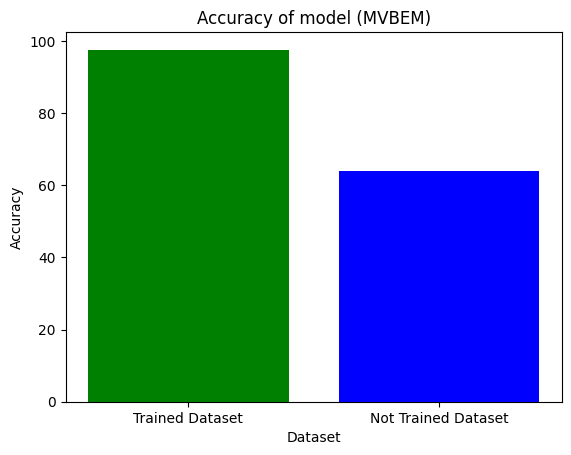

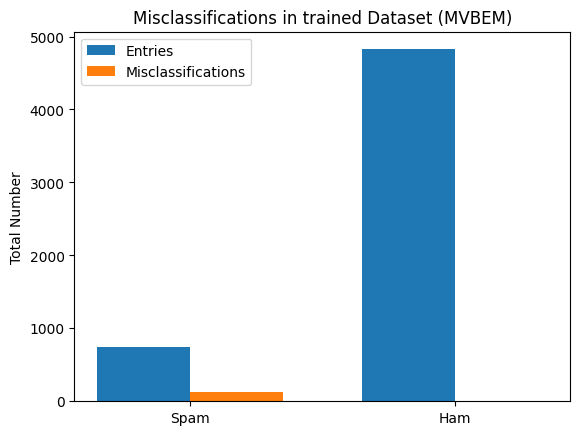

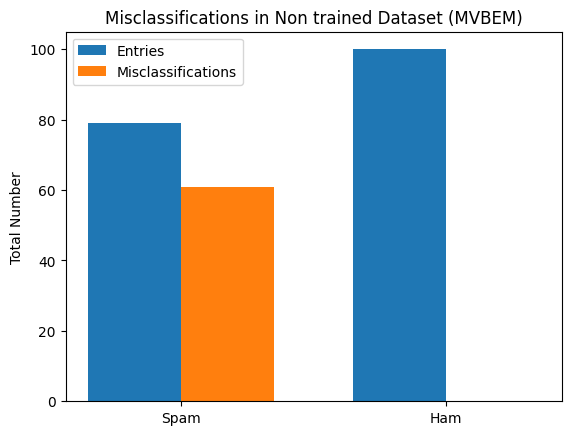

In [13]:
plot_diff_accuracy(accuracy_trained_mvbem, accuracy_not_trained_mvbem, "Accuracy of model (MVBEM)")
plot_misclassifications(Y_SUM, N - Y_SUM, mc_class_trained_mvbem, "Misclassifications in trained Dataset (MVBEM)")
plot_misclassifications(tf.reduce_sum(_Y), len(_X) - tf.reduce_sum(_Y), mc_class_not_trained_mvbem, "Misclassifications in Non trained Dataset (MVBEM)")

# **The Multinomial Event Model**

### STEP 1: PARSING THE DATA
First we have to process the data into our intended format. Specifically to 

$Y \epsilon \R^{1 \times N}$ = where the $i'th$  entry represents whether the $i'th$ text is a spam or not (1, 0)

$X_c \epsilon\R^{N \times D}$ = where the $X_{i, j}$ represents the count of the $j'th$ word in the $i'th$ email.

In [14]:
# Parse initial words to consider
words_to_consider = {}
parse_initial_words(words_to_consider, top_k_words_path, add_undefined_token=True)

# Parse the data
X, Y = parse_data(map_text_to_matrix_MNEM, words_to_consider, chunksize, dataset_path, 1, 0, encoding="latin-1", convert_to_int=True, log_progress=False)
N, D = len(X), len(words_to_consider)

gc.collect() # delete previous words_to_consider, X and Y to save RAM

print("Total number of words to consider: ", D)
print("Total number of emails: ", N)                    
display_tensor(X, "X")                                                                                                                                                                                                                                                 
display_tensor(Y, "Y")

parsing initial words to consider
parsing succesfull
Parsing data
Successfully parsed data
Total number of words to consider:  15210
Total number of emails:  5572
X: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
shape:  (5572, 15210)
Y: 
 [[0. 0. 1. ... 0. 0. 0.]]
shape:  (1, 5572)


### STEP 2: COMPUTING THE PARAMETERS
To compute for the parameters 
We will use the following formulaes

$$
\phi_y = \frac{1}{N}sum(Y) \\
\phi_{k|y=1} = \frac{a + YX_c}{aD + sum(YX_c)} \\
\phi_{k|y=0} = \frac{1 + (1-Y)X_c}{aD + sum((1-Y)X_c)}
$$

In [15]:
PHI_y = tf.reduce_sum(Y) / N

YX = tf.matmul(Y, X)
_YX = tf.matmul((1 - Y), X)

PHI_k_y1 = (a + YX) / (a * D + tf.reduce_sum(YX))
PHI_k_y0 = (a + _YX) / (a * D + tf.reduce_sum(_YX))

display_tensor(PHI_y, "PHI_y")
display_tensor(PHI_k_y1, "PHI_k_y1")
display_tensor(PHI_k_y0, "PHI_k_y0")

PHI_y: 
 0.13406317300789664
shape:  ()
PHI_k_y1: 
 [[3.05017539e-05 6.25285954e-03 2.98917188e-03 ... 3.05017539e-05
  3.05017539e-05 3.05017539e-05]]
shape:  (1, 15210)
PHI_k_y0: 
 [[1.19627242e-05 1.33384374e-02 6.26846746e-03 ... 2.39254483e-05
  2.39254483e-05 2.39254483e-05]]
shape:  (1, 15210)


### STEP 3: MAKING PREDICTIONS
Now that we have the parameters. We're ready to make the predictions. To make the predictions, we will use the following formula 
$$
\frac{(1 - \phi_y)\sum_{i=1}^D\phi_{i|y=1}}{\phi_y\sum_{i=1}^D\phi_{i|y=0}} \prod_{k=1}^L\frac{\prod_{i=1}^{D}\phi_{i|y=0}^{I\{x_k = i \}}}{\prod_{i=1}^{D}\phi_{i|y=1}^{I\{x_k = i \}}} < 1 : spam
$$

I know it's long. It turns out, simplifying this gives us the same formula we used for MVBEM ! Now that's maths!


In [16]:
### We will use the function produce_prediction() above in the shared functions section

### STEP 4: CALCULATING THE ACCURACY
Now that we have finished all the essential parts, the last part is to calculate the accuracy of the model in identiying a spam or ham dataset using the dataset it is trained on and a dataset it has not seen before. 

In [17]:
# Calculating accuracy using the training dataset
accuracy_trained_mnem, mc_class_trained_mnem = calculate_accuracy(X, Y, PHI_y, PHI_k_y1, PHI_k_y0, 70, log_notice=False)

# Calculating accuracy using new dataset
_X, _Y = parse_data(map_text_to_matrix_MNEM, words_to_consider, chunksize, untrained_dataset_path, 0, 1, update_words_to_consider=False, convert_to_int=True, log_progress=False)
accuracy_not_trained_mnem, mc_class_not_trained_mnem = calculate_accuracy(_X, _Y, PHI_y, PHI_k_y1, PHI_k_y0, 70, log_notice=False)

gc.collect() # delete previous _X and _Y to save RAM

calculating accuracy MVBEM
calculating finished
Parsing data
Successfully parsed data
calculating accuracy MVBEM
calculating finished


0

### STEP 5: GRAPHING THE RESULTS
We can finally graph the results for better better visualization

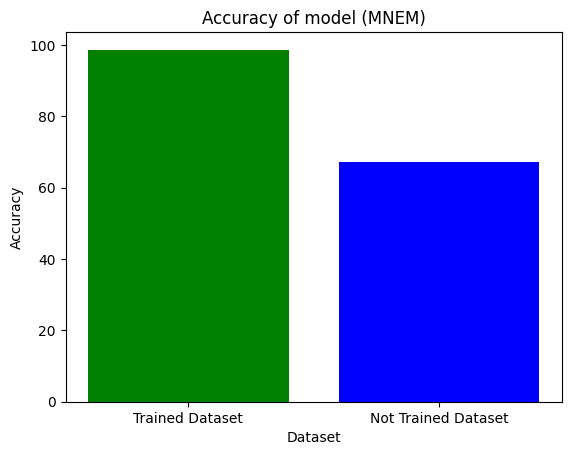

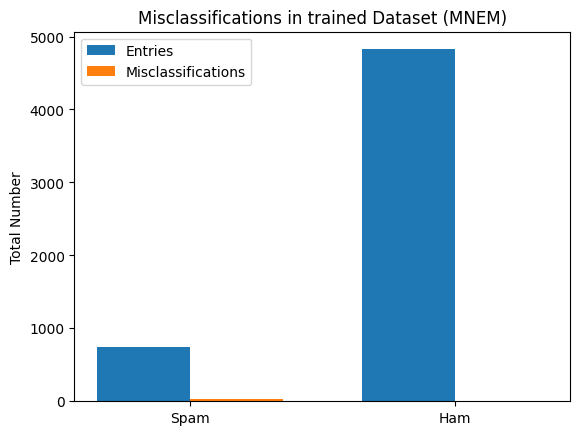

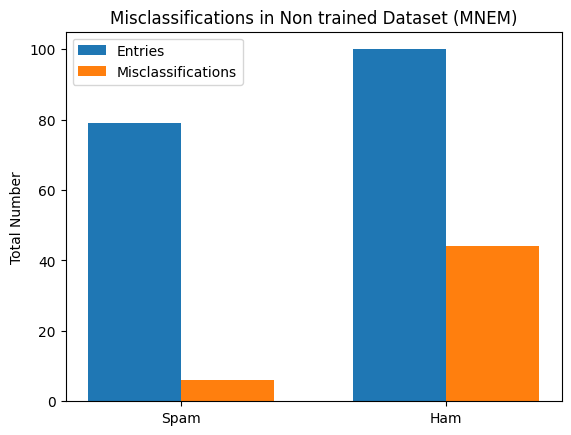

In [18]:
plot_diff_accuracy(accuracy_trained_mnem, accuracy_not_trained_mnem, "Accuracy of model (MNEM)")
plot_misclassifications(Y_SUM, N - Y_SUM, mc_class_trained_mnem, "Misclassifications in trained Dataset (MNEM)")
plot_misclassifications(tf.reduce_sum(_Y), len(_X) - tf.reduce_sum(_Y), mc_class_not_trained_mnem, "Misclassifications in Non trained Dataset (MNEM)")

# **Results**
Run once both models are executed

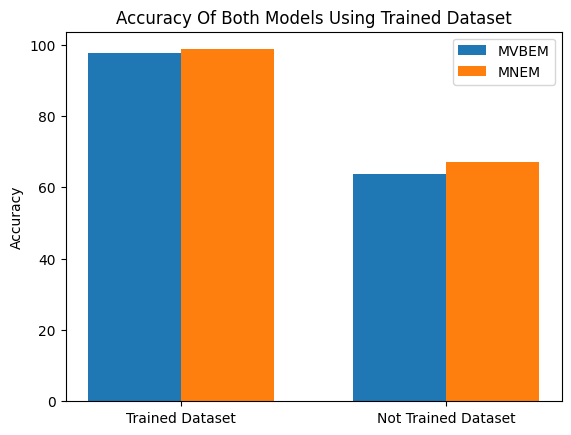

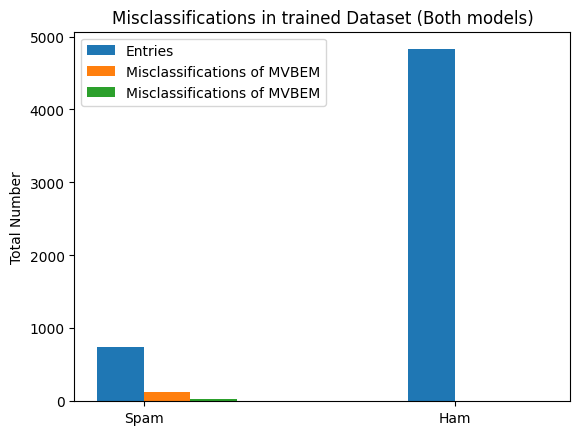

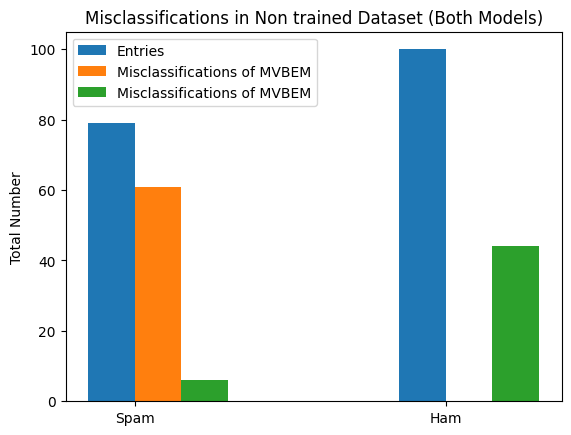

In [19]:
plot_accuracy_both_models([accuracy_trained_mvbem, accuracy_not_trained_mvbem], [accuracy_trained_mnem, accuracy_not_trained_mnem], "Accuracy Of Both Models Using Trained Dataset")
plot_misclassifications_of_both_models(Y_SUM, N - Y_SUM, mc_class_trained_mvbem, mc_class_trained_mnem, "Misclassifications in trained Dataset (Both models)")
plot_misclassifications_of_both_models(tf.reduce_sum(_Y), len(_X) - tf.reduce_sum(_Y), mc_class_not_trained_mvbem, mc_class_not_trained_mnem, "Misclassifications in Non trained Dataset (Both Models)")